<a href="https://colab.research.google.com/github/Amey2510/Test-Repo/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')

In [4]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


  AT: Atmospheric Temperature
  V: Vacumm
  AP: Atmospheric Pressure
  RH: Relative Humidity
  PE:Power Energy

## Perform Basic Data Quality Checks


In [5]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [7]:
df.duplicated().sum()

np.int64(41)

In [8]:
df = df.drop_duplicates()

## Seperate Data into Train and Test

In [26]:
X = df.drop(columns=['PE'])
Y = df['PE']

In [27]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Cleaning

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')

In [21]:
X_pre = num_pipe.fit_transform(X)

In [22]:
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.85,random_state=21)

In [29]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097,) (1430,)


## ANN Building

In [30]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [31]:
xtrain.shape

(8097, 4)

In [37]:
model = Sequential()

# Add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Hidden Layer1
model.add(Dense(units=8,activation='relu'))

# Add Hidden Layer2
model.add(Dense(units=4,activation='relu'))

# Add The Output Layer
model.add(Dense(units=1,activation='linear'))

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [42]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 206410.5938 - mae: 454.0056 - val_loss: 206674.6250 - val_mae: 454.2971
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 205326.7344 - mae: 452.8088 - val_loss: 203356.0312 - val_mae: 450.6283
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200534.9219 - mae: 447.4719 - val_loss: 193237.7812 - val_mae: 439.2316
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 188544.2500 - mae: 433.8059 - val_loss: 174302.6719 - val_mae: 416.9501
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167192.7500 - mae: 408.1456 - val_loss: 147310.1719 - val_mae: 382.6047
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 139170.5469 - mae: 371.2959 - val_loss: 113777.3906 - val_mae: 334.2891
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 104377.5547 - mae: 318.9512 - val_loss: 79689.5938 - val_mae: 274.8016
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72430.5312 - mae:

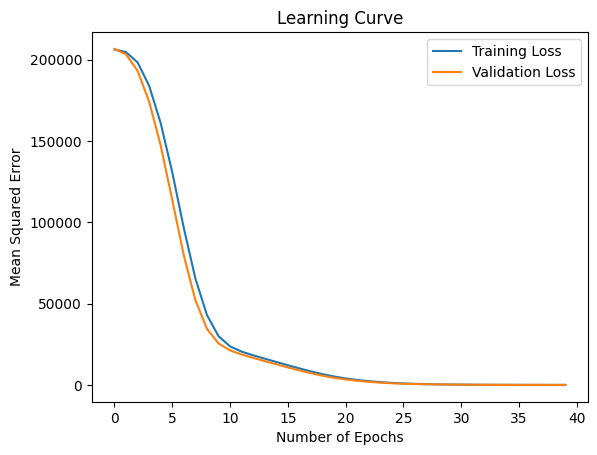

In [43]:
# Plot the Learning Curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curve')
plt.show()

## Model Evaluation

In [44]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 39.8171 - mae: 4.4853


[40.30814743041992, 4.505021572113037]

In [45]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.7873 - mae: 4.6246


[44.27850341796875, 4.670770168304443]

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
y_pred = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:
mse = mean_squared_error(ytest,y_pred)

In [50]:
mse

44.278505210425116

In [51]:
mae = mean_absolute_error(ytest,y_pred)

In [52]:
r2 = r2_score(ytest,y_pred)

In [53]:
r2

0.8502965873065071